## Load Packages

In [1]:
import datacube
from plotimg import rgb
from dream_river.ML import rice_detect

## Load data from Datacube

In [2]:
# connect to datacube
dc = datacube.Datacube(app='ML_classification')

In [3]:
# load data
ds = dc.load(product="ls8_collections_sr_scene",
             x=(100.657, 100.780),
             y=(13.995, 14.108),
             measurements = ['red','green','blue', 'nir'],
             time=("2015-06-15", "2015-06-30"),
             resolution= (-30,30),
             output_crs= "EPSG:32647"
            )
ds

<xarray.Dataset>
Dimensions:      (time: 1, y: 421, x: 447)
Coordinates:
  * time         (time) datetime64[ns] 2015-06-29T03:37:08
  * y            (y) float64 1.56e+06 1.56e+06 1.56e+06 ... 1.548e+06 1.548e+06
  * x            (x) float64 6.789e+05 6.789e+05 ... 6.922e+05 6.923e+05
    spatial_ref  int32 32647
Data variables:
    red          (time, y, x) int16 1080 739 710 932 968 ... 223 255 275 283 282
    green        (time, y, x) int16 975 729 754 900 856 ... 417 452 451 443 453
    blue         (time, y, x) int16 708 425 440 594 580 ... 199 210 225 231 226
    nir          (time, y, x) int16 2995 2989 3246 2755 ... 3806 3866 3894 3834
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Set query for input

In [4]:
field = "values" #column name
product = "ls8_collections_sr_scene" # satellite image on datacube
time=("2015-06-15", "2015-06-30")
resolution= (-30,30)
output_crs= "EPSG:32647"

# set query to extract data from satelite image
query = {'product' :"ls8_collections_sr_scene",
        'measurements':['red','green','blue','nir','swir_1'], # used to be the parameter to train model
        'time': time,
        'resolution': resolution,
        'output_crs': output_crs,
        'group_by': 'solar_day'}

# define raster name to export tiff image(used to create polygon for train model)
raster_name= 'training/AOI.tif'

# define vector name to export in shapefile(used to create training data)
vector_name= 'training/output_vector.shp'

## Display study area

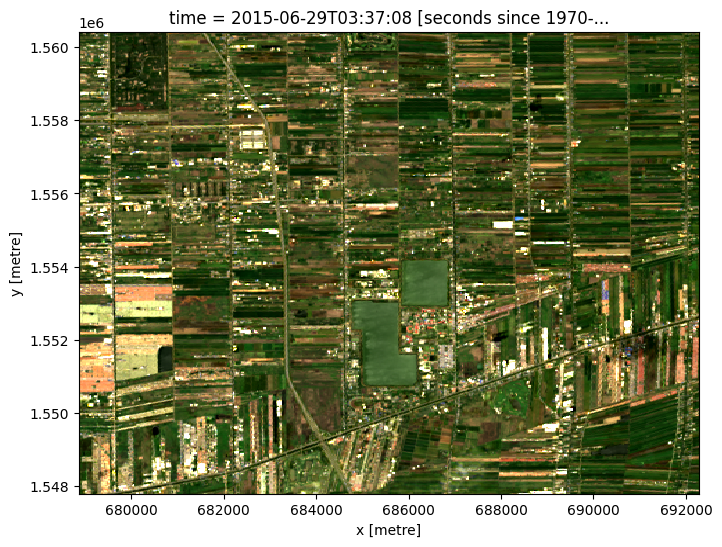

In [5]:
rgb(ds, 
    bands=['red','green', 'blue'], 
    index =[0])

## Detect rice cultivated area

In [ ]:
rice_detect(ds,
            product,
            outname_raster=raster_name, 
            outname_vector=vector_name, 
            query=query, 
            field=field)

 * info: creating integer raster to Polygonize:
   >> training/AOI_int.tif
Success: Wrote training/output_vector.shp
Taking zonal statistic: median


  0%|          | 0/1776 [00:00<?, ?it/s]